In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys

from core.tops.config.lazy import LazyConfig
from core.tops.config.instantiate import instantiate

In [2]:
cfg = LazyConfig.load("core/configs/task24/retina_P1_7.py")
anchors = instantiate(cfg.anchors)(order="xywh")
print("Number of anchors:", len(anchors))

Number of anchors: 65520


In [3]:
PREV_X = None
PREV_Y = None
UNIQUE_BOXES = []

def plot_bbox(model_cfg, ax, box, color, circle=True):
    global PREV_X, PREV_Y
    cx, cy, w, h = box
    cx *= model_cfg.train.imshape[1]
    cy *= model_cfg.train.imshape[0]
    w *= model_cfg.train.imshape[1]
    h *= model_cfg.train.imshape[0]
    x1, y1 = cx + w/2, cy + h/2
    x0, y0 = cx - w/2, cy - h/2
    if PREV_X != x1-x0 and PREV_Y != y1-y0:
        PREV_X = x1-x0
        PREV_Y = y1-y0
        UNIQUE_BOXES.append((PREV_X, PREV_Y))
        print(f"(X, Y) = ({PREV_X}, {PREV_Y})")

    if circle:
        ax.add_artist(matplotlib.patches.Ellipse([cx, cy], w,h, alpha=.1, color=color))
        plt.plot(cx, cy, f"o{color}")
    else:
        plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0], f"{color}", alpha=.5)
        
def get_num_boxes_in_fmap(model_cfg, idx):
    boxes_per_location = 2 + 2*len(model_cfg.anchors.aspect_ratios[idx])
    feature_map_size = model_cfg.anchors.feature_sizes[idx]
    return int(boxes_per_location * np.prod(feature_map_size))

def run_all(aspect_ratio_indices):
    # selection = [0, 1, 2, 3, 4, 5, 6]
    # aspect_ratio_indices = [selection[i] for i in range(idx)]
    # feature_sizes=[[32, 256], [16, 128], [8, 64], [4, 32], [2, 16], [1, 8]]
    fmap_idx_to_visualize = 5

    print("Aspect used for feature map:", cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
    # Set which aspect ratio indices we want to visualize

    PLOT_CIRCLE = True
    offset = sum([get_num_boxes_in_fmap(cfg, prev_layer) for prev_layer in range(fmap_idx_to_visualize)])
    
    fig, ax = plt.subplots(dpi=300)

    # Set up our scene
    plt.ylim([-100, cfg.train.imshape[0]+100])
    plt.xlim([-100, cfg.train.imshape[1]+100])
    plt.axis("off")

    boxes_per_location = 2 + 2*len(cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
    indices_to_visualize = []
    colors = []
    available_colors = ["r", "g", "b", "y", "m", "b","w"]

    for idx in range(offset, offset + get_num_boxes_in_fmap(cfg, fmap_idx_to_visualize)):
        for aspect_ratio_idx in aspect_ratio_indices:
            if idx % boxes_per_location == aspect_ratio_idx:
                indices_to_visualize.append(idx)
                colors.append(available_colors[aspect_ratio_idx])

    ax.add_artist(plt.Rectangle([0, 0], cfg.train.imshape[1], cfg.train.imshape[0]))
    for i, idx in enumerate(indices_to_visualize):
        prior = anchors[idx]
        color = colors[i]
        plot_bbox(cfg, ax, prior, color, circle=False)

    # meta = f"""
    # Location shape     : {cfg.anchors.feature_sizes[fmap_idx_to_visualize]}
    # Boxes per location : {boxes_per_location}
    # Total boxes        : {get_num_boxes_in_fmap(cfg, fmap_idx_to_visualize)}
    # """
    # print(meta)
    plt.margins(0,0)
    plt.show()



Aspect used for feature map: [0.5, 0.5]
(X, Y) = (128.0, 128.0)
(X, Y) = (181.01934814453125, 90.50967407226562)
(X, Y) = (90.50967407226562, 128.0)
(X, Y) = (181.01934814453125, 90.50967407226562)
(X, Y) = (90.50967407226562, 128.0)


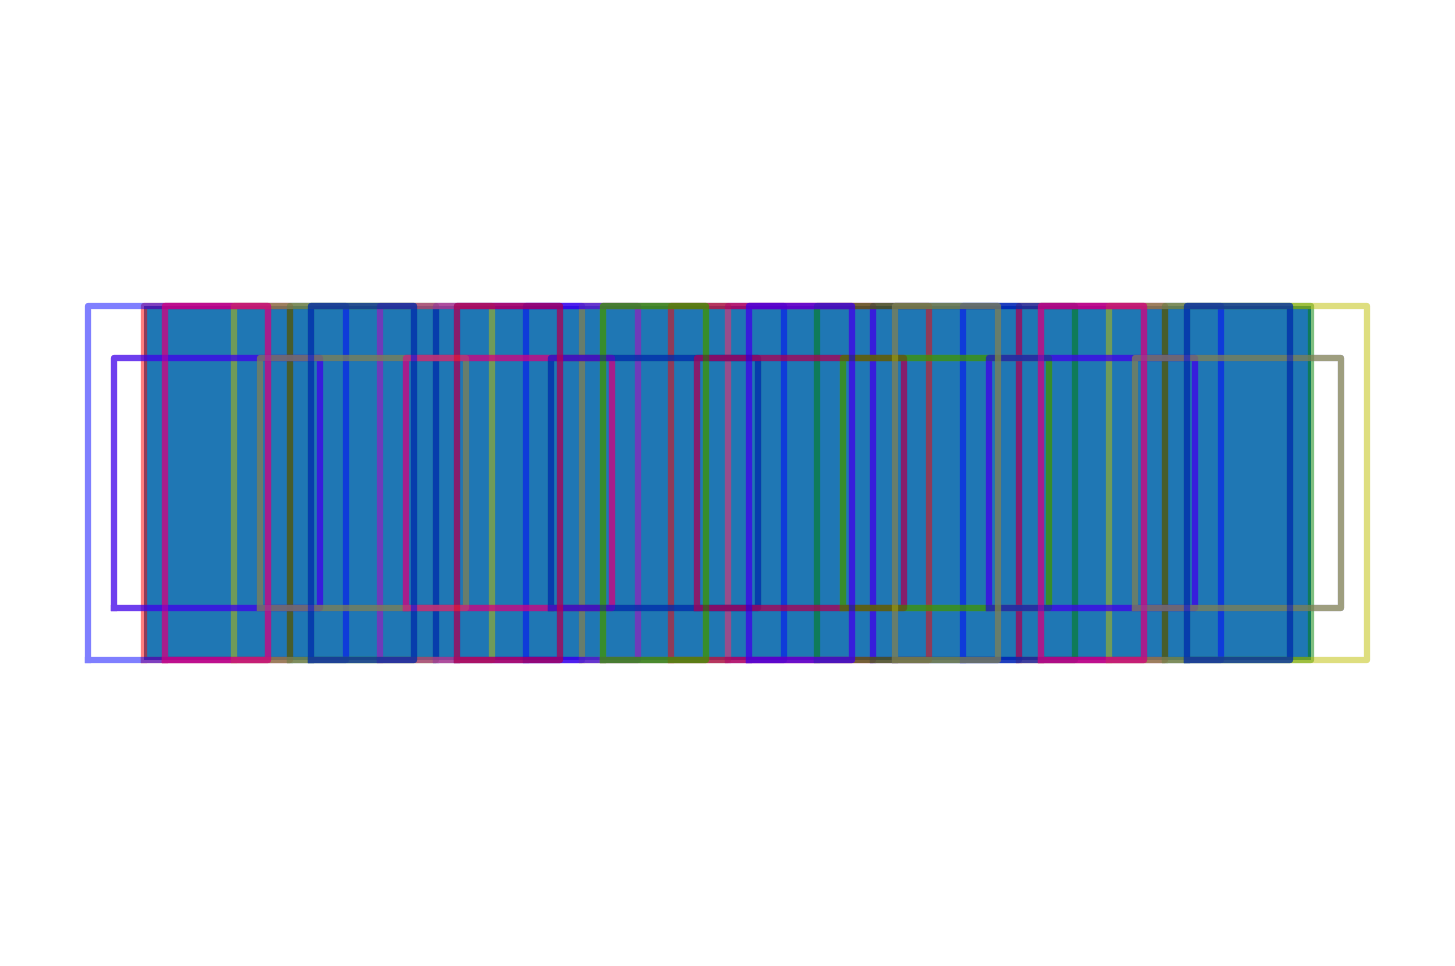

In [4]:
run_all([0, 1, 2, 3, 4, 5])

In [5]:
# fig, ax = plt.subplots(dpi=300)

# # Set up our scene
# plt.ylim([0, 128])
# plt.xlim([0, 1024])
# plt.axis("off")

# N_UNIQUE_BOXES = len(UNIQUE_BOXES)
# placement_positions = np.linspace(0, 1000, N_UNIQUE_BOXES, dtype=np.int32)

# for (x, y), clr, xpos in zip(reversed(UNIQUE_BOXES), available_colors, placement_positions):
#     # Draw rectangle
#     rect = matplotlib.patches.Rectangle([xpos, 0], x, y, alpha=.1, color=clr, label=f"({x}, {y})")
#     # Draw text
#     ax.text(xpos, y+5, f"({round(x.item())}, {round(y.item())})", color=clr)
#     ax.add_artist(rect)

# plt.axis("off")
# plt.title(f"Unique boxes = {N_UNIQUE_BOXES}")
# plt.show()


